## Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default='notebook'
py.init_notebook_mode(connected=True)

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            roc_auc_score, roc_curve, auc, precision_recall_curve,
                            confusion_matrix)

from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, KFold

from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

import shap

pd.set_option('display.max_rows', 250)

## Loading Dataset 

In [2]:

# Read the Excel file
Data = pd.read_csv("C:/Users/RIyasingh/Downloads/Patient Survival Detection/Patient Survival Detection/Dataset.csv")



In [3]:
Data.isna().sum()

encounter_id                         0
patient_id                           0
hospital_id                          0
hospital_death                       0
age                               4228
bmi                               3429
elective_surgery                     0
ethnicity                         1395
gender                              25
height                            1334
hospital_admit_source            21409
icu_admit_source                   112
icu_id                               0
icu_stay_type                        0
icu_type                             0
pre_icu_los_days                     0
readmission_status                   0
weight                            2720
albumin_apache                   54379
apache_2_diagnosis                1662
apache_3j_diagnosis               1101
apache_post_operative                0
arf_apache                         715
bilirubin_apache                 58134
bun_apache                       19262
creatinine_apache        

In [4]:

null_counts = Data.isnull().sum()

# Display information about the DataFrame
Data.info()

# Display the count of null values for each column
print("Null counts for each column:")
print(null_counts)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB
Null counts for each column:
encounter_id                         0
patient_id                           0
hospital_id                          0
hospital_death                       0
age                               4228
bmi                               3429
elective_surgery                     0
ethnicity                         1395
gender                              25
height                            1334
hospital_admit_source            21409
icu_admit_source                   112
icu_id                               0
icu_stay_type                        0
icu_type                             0
pre_icu_los_days                     0
readmission_status                   0
weight                            2720
albumin_apache                   54379
apache_2_diagnosis            

In [5]:
Data.describe()

encounter_id     patient_id   hospital_id  hospital_death  \
count   91713.000000   91713.000000  91713.000000    91713.000000   
mean    65606.079280   65537.131464    105.669262        0.086302   
std     37795.088538   37811.252183     62.854406        0.280811   
min         1.000000       1.000000      2.000000        0.000000   
25%     32852.000000   32830.000000     47.000000        0.000000   
50%     65665.000000   65413.000000    109.000000        0.000000   
75%     98342.000000   98298.000000    161.000000        0.000000   
max    131051.000000  131051.000000    204.000000        1.000000   

                age           bmi  elective_surgery        height  \
count  87485.000000  88284.000000      91713.000000  90379.000000   
mean      62.309516     29.185818          0.183736    169.641588   
std       16.775119      8.275142          0.387271     10.795378   
min       16.000000     14.844926          0.000000    137.200000   
25%       52.000000     23.641975          0.000000    162.500000   
50%       65.000000     27.654655          0.000000    170.100000   
75%       75.000000     32.930206          0.000000    177.800000   
max       89.000000     67.814990          1.000000    195.590000   

             icu_id  pre_icu_los_days  ...  apache_4a_hospital_death_prob  \
count  91713.000000      91713.000000  ...                   83766.000000   
mean     508.357692          0.835766  ...                       0.086787   
std      228.989661          2.487756  ...                       0.247569   
min       82.000000        -24.947222  ...                      -1.000000   
25%      369.000000          0.035417  ...                       0.020000   
50%      504.000000          0.138889  ...                       0.050000   
75%      679.000000          0.409028  ...                       0.130000   
max      927.000000        159.090972  ...                       0.990000   

       apache_4a_icu_death_prob          aids     cirrhosis  \
count              83766.000000  90998.000000  90998.000000   
mean                   0.043955      0.000857      0.015693   
std                    0.217341      0.029265      0.124284   
min                   -1.000000      0.000000      0.000000   
25%                    0.010000      0.000000      0.000000   
50%                    0.020000      0.000000      0.000000   
75%                    0.060000      0.000000      0.000000   
max                    0.970000      1.000000      1.000000   

       diabetes_mellitus  hepatic_failure  immunosuppression      leukemia  \
count       90998.000000     90998.000000       90998.000000  90998.000000   
mean            0.225192         0.012989           0.026165      0.007066   
std             0.417711         0.113229           0.159628      0.083763   
min             0.000000         0.000000           0.000000      0.000000   
25%             0.000000         0.000000           0.000000      0.000000   
50%             0.000000         0.000000           0.000000      0.000000   
75%             0.000000         0.000000           0.000000      0.000000   
max             1.000000         1.000000           1.000000      1.000000   

           lymphoma  solid_tumor_with_metastasis  
count  90998.000000                 90998.000000  
mean       0.004132                     0.020638  
std        0.064148                     0.142169  
min        0.000000                     0.000000  
25%        0.000000                     0.000000  
50%        0.000000                     0.000000  
75%        0.000000                     0.000000  
max        1.000000                     1.000000  

[8 rows x 178 columns]

In [6]:
Data.isnull().sum(axis=0).sort_values(ascending=False)

h1_bilirubin_min                 84619
h1_bilirubin_max                 84619
h1_lactate_max                   84369
h1_lactate_min                   84369
h1_albumin_max                   83824
h1_albumin_min                   83824
h1_pao2fio2ratio_min             80195
h1_pao2fio2ratio_max             80195
h1_arterial_ph_max               76424
h1_arterial_ph_min               76424
h1_hco3_max                      76094
h1_hco3_min                      76094
h1_arterial_pco2_min             75959
h1_arterial_pco2_max             75959
h1_wbc_max                       75953
h1_wbc_min                       75953
h1_arterial_po2_max              75945
h1_arterial_po2_min              75945
h1_calcium_max                   75863
h1_calcium_min                   75863
h1_platelets_max                 75673
h1_platelets_min                 75673
h1_bun_max                       75091
h1_bun_min                       75091
h1_creatinine_max                74957
h1_creatinine_min        

In [7]:
print("Number of rows with missing values:", Data.isnull().any(axis=1).sum())

Number of rows with missing values: 91688


In [8]:
large_missing = Data.isnull().sum(axis=0).sort_values(ascending=False)[Data.isnull().sum(axis=0).sort_values(ascending=False) > 25000]

print("\nTotal features with more than", 25000, "missing values:", len(large_missing))

Data.drop(large_missing.index.tolist() + ['encounter_id', 'hospital_admit_source', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'patient_id', 'hospital_id', 'readmission_status'], 
              axis=1,
             inplace = True)
Data


Total features with more than 25000 missing values: 74


hospital_death   age        bmi  elective_surgery  ethnicity gender  \
0                   0  68.0  22.730000                 0  Caucasian      M   
1                   0  77.0  27.420000                 0  Caucasian      F   
2                   0  25.0  31.950000                 0  Caucasian      F   
3                   0  81.0  22.640000                 1  Caucasian      F   
4                   0  19.0        NaN                 0  Caucasian      M   
...               ...   ...        ...               ...        ...    ...   
91708               0  75.0  23.060250                 0  Caucasian      M   
91709               0  56.0  47.179671                 0  Caucasian      F   
91710               0  48.0  27.236914                 0  Caucasian      M   
91711               0   NaN  23.297481                 0  Caucasian      F   
91712               0  82.0  22.031250                 1  Caucasian      F   

       height      icu_type  pre_icu_los_days  weight  ...  aids  cirrhosis  \
0       180.3         CTICU          0.541667    73.9  ...   0.0        0.0   
1       160.0  Med-Surg ICU          0.927778    70.2  ...   0.0        0.0   
2       172.7  Med-Surg ICU          0.000694    95.3  ...   0.0        0.0   
3       165.1         CTICU          0.000694    61.7  ...   0.0        0.0   
4       188.0  Med-Surg ICU          0.073611     NaN  ...   0.0        0.0   
...       ...           ...               ...     ...  ...   ...        ...   
91708   177.8   Cardiac ICU          0.298611    72.9  ...   0.0        0.0   
91709   183.0  Med-Surg ICU          0.120139   158.0  ...   0.0        0.0   
91710   170.2  Med-Surg ICU          0.046528    78.9  ...   0.0        0.0   
91711   154.9  Med-Surg ICU          0.081944    55.9  ...   0.0        0.0   
91712   160.0  Med-Surg ICU          0.018056    56.4  ...   0.0        0.0   

       diabetes_mellitus  hepatic_failure  immunosuppression  leukemia  \
0                    1.0              0.0                0.0       0.0   
1                    1.0              0.0                0.0       0.0   
2                    0.0              0.0                0.0       0.0   
3                    0.0              0.0                0.0       0.0   
4                    0.0              0.0                0.0       0.0   
...                  ...              ...                ...       ...   
91708                1.0              0.0                0.0       0.0   
91709                0.0              0.0                0.0       0.0   
91710                1.0              0.0                0.0       0.0   
91711                0.0              0.0                0.0       0.0   
91712                0.0              0.0                0.0       0.0   

       lymphoma  solid_tumor_with_metastasis  apache_3j_bodysystem  \
0           0.0                          0.0                Sepsis   
1           0.0                          0.0           Respiratory   
2           0.0                          0.0             Metabolic   
3           0.0                          0.0        Cardiovascular   
4           0.0                          0.0                Trauma   
...         ...                          ...                   ...   
91708       0.0                          1.0                Sepsis   
91709       0.0                          0.0                Sepsis   
91710       0.0                          0.0             Metabolic   
91711       0.0                          0.0           Respiratory   
91712       0.0                          0.0      Gastrointestinal   

       apache_2_bodysystem  
0           Cardiovascular  
1              Respiratory  
2                Metabolic  
3           Cardiovascular  
4                   Trauma  
...                    ...  
91708       Cardiovascular  
91709       Cardiovascular  
91710            Metabolic  
91711          Respiratory  
91712     Gastrointestinal  

[91713 rows x 104 columns]

In [9]:
Data.nunique()

hospital_death                       2
age                                 74
bmi                              34888
elective_surgery                     2
ethnicity                            6
gender                               2
height                             401
icu_type                             8
pre_icu_los_days                  9757
weight                            3409
apache_2_diagnosis                  44
apache_3j_diagnosis                399
apache_post_operative                2
arf_apache                           2
bun_apache                         476
creatinine_apache                 1127
gcs_eyes_apache                      4
gcs_motor_apache                     6
gcs_unable_apache                    2
gcs_verbal_apache                    5
glucose_apache                     565
heart_rate_apache                  149
hematocrit_apache                  353
intubated_apache                     2
map_apache                         161
resprate_apache          

In [10]:
Data = Data[Data[['bmi', 'weight', 'height']].isna().sum(axis=1) == 0]
Data

hospital_death   age        bmi  elective_surgery  ethnicity gender  \
0                   0  68.0  22.730000                 0  Caucasian      M   
1                   0  77.0  27.420000                 0  Caucasian      F   
2                   0  25.0  31.950000                 0  Caucasian      F   
3                   0  81.0  22.640000                 1  Caucasian      F   
5                   0  67.0  27.560000                 0  Caucasian      M   
...               ...   ...        ...               ...        ...    ...   
91708               0  75.0  23.060250                 0  Caucasian      M   
91709               0  56.0  47.179671                 0  Caucasian      F   
91710               0  48.0  27.236914                 0  Caucasian      M   
91711               0   NaN  23.297481                 0  Caucasian      F   
91712               0  82.0  22.031250                 1  Caucasian      F   

       height      icu_type  pre_icu_los_days  weight  ...  aids  cirrhosis  \
0       180.3         CTICU          0.541667    73.9  ...   0.0        0.0   
1       160.0  Med-Surg ICU          0.927778    70.2  ...   0.0        0.0   
2       172.7  Med-Surg ICU          0.000694    95.3  ...   0.0        0.0   
3       165.1         CTICU          0.000694    61.7  ...   0.0        0.0   
5       190.5  Med-Surg ICU          0.000694   100.0  ...   0.0        0.0   
...       ...           ...               ...     ...  ...   ...        ...   
91708   177.8   Cardiac ICU          0.298611    72.9  ...   0.0        0.0   
91709   183.0  Med-Surg ICU          0.120139   158.0  ...   0.0        0.0   
91710   170.2  Med-Surg ICU          0.046528    78.9  ...   0.0        0.0   
91711   154.9  Med-Surg ICU          0.081944    55.9  ...   0.0        0.0   
91712   160.0  Med-Surg ICU          0.018056    56.4  ...   0.0        0.0   

       diabetes_mellitus  hepatic_failure  immunosuppression  leukemia  \
0                    1.0              0.0                0.0       0.0   
1                    1.0              0.0                0.0       0.0   
2                    0.0              0.0                0.0       0.0   
3                    0.0              0.0                0.0       0.0   
5                    1.0              0.0                0.0       0.0   
...                  ...              ...                ...       ...   
91708                1.0              0.0                0.0       0.0   
91709                0.0              0.0                0.0       0.0   
91710                1.0              0.0                0.0       0.0   
91711                0.0              0.0                0.0       0.0   
91712                0.0              0.0                0.0       0.0   

       lymphoma  solid_tumor_with_metastasis  apache_3j_bodysystem  \
0           0.0                          0.0                Sepsis   
1           0.0                          0.0           Respiratory   
2           0.0                          0.0             Metabolic   
3           0.0                          0.0        Cardiovascular   
5           0.0                          0.0          Neurological   
...         ...                          ...                   ...   
91708       0.0                          1.0                Sepsis   
91709       0.0                          0.0                Sepsis   
91710       0.0                          0.0             Metabolic   
91711       0.0                          0.0           Respiratory   
91712       0.0                          0.0      Gastrointestinal   

       apache_2_bodysystem  
0           Cardiovascular  
1              Respiratory  
2                Metabolic  
3           Cardiovascular  
5               Neurologic  
...                    ...  
91708       Cardiovascular  
91709       Cardiovascular  
91710            Metabolic  
91711          Respiratory  
91712     Gastrointestinal  

[88284 rows x 104 columns]

## Univariate and Multivariate

In [11]:
fig = px.histogram(Data[['age','gender','hospital_death','bmi']].dropna(), x="age", y="hospital_death", color="gender",
                   marginal="box", # or violin, rug
                   hover_data=Data[['age','gender','hospital_death','bmi']].columns)
fig.show()

In [12]:
age_death_F=Data[Data['gender']=='F'][['age','hospital_death']].groupby('age').mean().reset_index()
age_death_M=Data[Data['gender']=='M'][['age','hospital_death']].groupby('age').mean().reset_index()
from plotly.subplots import make_subplots
fig = make_subplots()
fig.add_trace(
    go.Scatter(x=age_death_F['age'], y=age_death_F['hospital_death'], name="Female patients"))
fig.add_trace(
    go.Scatter(x=age_death_M['age'], y=age_death_M['hospital_death'],name="Male patients"))
fig.update_layout(
    title_text="<b>Average hospital death probability of patients<b>")
fig.update_xaxes(title_text="<b>patient age<b>")
fig.update_yaxes(title_text="<b>Average Hospital Death</b>", secondary_y=False)
fig.show()

In [13]:
weight_df=Data[['weight','hospital_death','bmi']]
weight_df['weight']=weight_df['weight'].round(0)
weight_df['bmi']=weight_df['bmi'].round(0)
weight_death=weight_df[['weight','hospital_death']].groupby('weight').mean().reset_index()
bmi_death=weight_df[['bmi','hospital_death']].groupby('bmi').mean().reset_index()
fig = make_subplots(rows=1, cols=1, shared_yaxes=True)
fig.add_trace(
    go.Scatter(x=weight_death['weight'], y=weight_death['hospital_death'], name="Weight"),
)
fig.add_trace(
    go.Scatter(x=bmi_death['bmi'], y=bmi_death['hospital_death'], name="BMI"),
)
fig.update_layout(
    title_text="<b>impacts of BMI and weight over patients<b>"
)
fig.update_yaxes(title_text="<b>Average Hospital Death")
fig.show()

In [14]:
ICU_type=Data[['icu_type','age','hospital_death']]
ICU_type['icu_type']=ICU_type['icu_type'].replace({'CTICU':'CCU-CTICU',
                                              'Cardiac ICU':'CCT-CTICU',
                                              'CTICU':'CCT-CTICU',
                                              'CSICU':'SICU'})
#ICU_type['pre_icu_los_days']=ICU_type['pre_icu_los_days'].round(0)
ICU_df=ICU_type.groupby(['icu_type','age']).mean().reset_index()
ICU_df['count']=ICU_type.groupby(['icu_type','age']).count().reset_index()['hospital_death']

fig = px.scatter(ICU_df, x="age", y="hospital_death", size="count", color="icu_type",
           hover_name="icu_type", log_x=False, size_max=60,)
fig.update_layout(
    title_text="<b>Survival rate at different types of ICU<b>"
)
fig.update_yaxes(title_text="<b>Average Hospital Death<b>")
fig.update_xaxes(title_text="<b>Age<b>")
fig.show()

In [15]:
apache3=Data[['age','apache_3j_bodysystem','hospital_death']]
apache3=apache3.groupby(['apache_3j_bodysystem','age']).agg(['size','mean']).reset_index()

apache3['size']=apache3['hospital_death']['size']
apache3['mean']=apache3['hospital_death']['mean']

apache3.drop('hospital_death',axis=1,inplace=True)

systems =list(apache3['apache_3j_bodysystem'].unique())
data = []
list_updatemenus = []
for n, s in enumerate(systems):
    visible = [False] * len(systems)
    visible[n] = True
    temp_dict = dict(label = str(s),
                 method = 'update',
                 args = [{'visible': visible},
                         {'title': '<b>'+s+'<b>'}])
    list_updatemenus.append(temp_dict)
    

for s in systems:
    mask = (apache3['apache_3j_bodysystem'].values == s) 
    trace = (dict(visible = False,     
        x = apache3.loc[mask, 'age'],
        y = apache3.loc[mask, 'mean'],
        mode = 'markers',
        marker = {'size':apache3.loc[mask, 'size']/apache3.loc[mask,'size'].sum()*1000,
                 'color':apache3.loc[mask, 'mean'],
                 'showscale': True})
                   )
    data.append(trace)

data[0]['visible'] = True    
    
layout = dict(updatemenus=list([dict(buttons= list_updatemenus)]),
              xaxis=dict(title = '<b>Age<b>', range=[min(apache3.loc[:, 'age'])-10, max(apache3.loc[:, 'age']) + 10]),
              yaxis=dict(title = '<b>Average Hospital Death<b>', range=[min(apache3.loc[:, 'mean'])-0.1, max(apache3.loc[:, 'mean'])+0.1]),
              title='<b>Survival Rate<b>' )
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='update_dropdown')

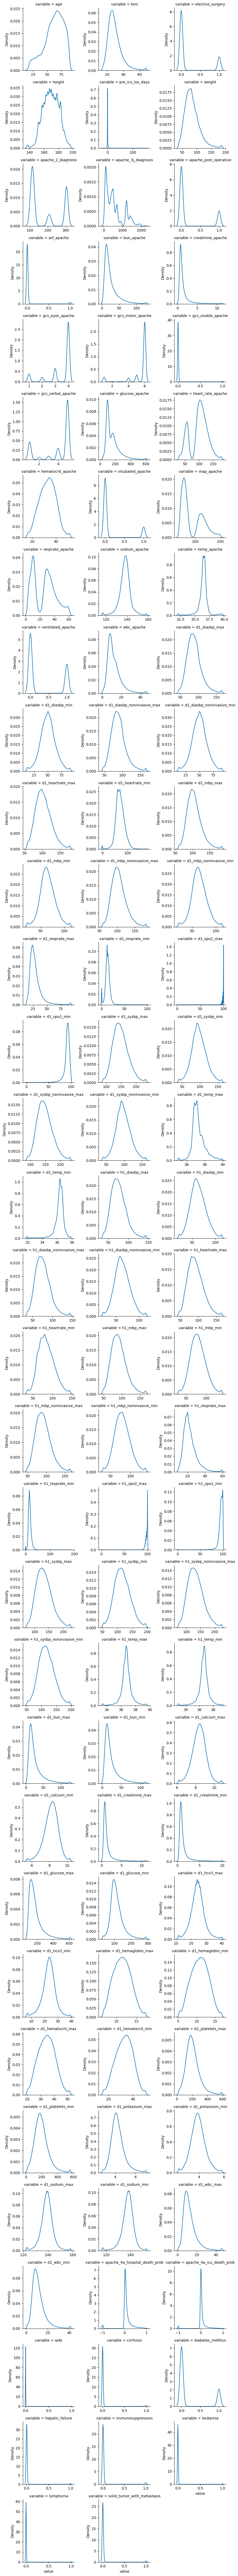

In [16]:
unpivot = pd.melt(Data, Data.describe().columns[0], Data.describe().columns[1:])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.kdeplot, "value")

plt.show()

##  Data Preprocessing 

In [17]:
numerical_cat = [
 'elective_surgery',
 'apache_post_operative',
 'arf_apache',
 'gcs_unable_apache',
 'intubated_apache',
 'ventilated_apache',
 'aids',
 'cirrhosis',
 'diabetes_mellitus',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis']

categorical = ['ethnicity',
 'gender',
 'icu_type',
 'apache_3j_bodysystem',
 'apache_2_bodysystem']


In [18]:
Data.nunique()[Data.nunique() == 2].index.tolist()

['hospital_death',
 'elective_surgery',
 'gender',
 'apache_post_operative',
 'arf_apache',
 'gcs_unable_apache',
 'intubated_apache',
 'ventilated_apache',
 'aids',
 'cirrhosis',
 'diabetes_mellitus',
 'hepatic_failure',
 'immunosuppression',
 'leukemia',
 'lymphoma',
 'solid_tumor_with_metastasis']

In [19]:
Data.select_dtypes(include='O').columns.values.tolist()

['ethnicity',
 'gender',
 'icu_type',
 'apache_3j_bodysystem',
 'apache_2_bodysystem']

In [20]:
not_numeric = Data[numerical_cat + categorical + ['hospital_death']].columns.tolist()
numeric_only = Data.drop(not_numeric,axis=1).columns.tolist()
numeric_only

['age',
 'bmi',
 'height',
 'pre_icu_los_days',
 'weight',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'bun_apache',
 'creatinine_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'map_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'wbc_apache',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_max',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_resprate_min',
 'd1_spo2_max',
 'd1_spo2_min',
 'd1_sysbp_max',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_max',
 'd1_sysbp_noninvasive_min',
 'd1_temp_max',
 'd1_temp_min',
 'h1_diasbp_max',
 'h1_diasbp_min',
 'h1_diasbp_noninvasive_max',
 'h1_diasbp_noninvasive_min',
 'h1_heartrate_max',
 'h1_heartrate_min',
 'h1_mbp_max',
 'h1_mbp_min',
 'h1_mbp_noninvasive_max',
 'h1_mbp_noninvasive_min',
 'h1_re

### Standardizing the train and test data

In [21]:
for col in numerical_cat:
    Data[col] = Data[col].astype('Int64')
    
for col in numerical_cat:
    Data[col] = Data[col].fillna(Data[col].mode()[0])

In [22]:
Data[numeric_only].isna().sum(axis=0).sort_values(ascending=False)

wbc_apache                       21063
h1_temp_max                      20833
h1_temp_min                      20833
hematocrit_apache                19005
bun_apache                       18289
creatinine_apache                17926
sodium_apache                    17644
d1_hco3_max                      14390
d1_hco3_min                      14390
d1_platelets_min                 12767
d1_platelets_max                 12767
d1_wbc_max                       12501
d1_wbc_min                       12501
d1_calcium_min                   12315
d1_calcium_max                   12315
d1_hemaglobin_max                11519
d1_hemaglobin_min                11519
d1_hematocrit_max                11051
d1_hematocrit_min                11051
glucose_apache                   10473
d1_bun_min                        9860
d1_bun_max                        9860
d1_creatinine_min                 9561
d1_creatinine_max                 9561
d1_sodium_max                     9554
d1_sodium_min            

In [23]:
split_one = Data[numeric_only].isna().sum(axis=0).sort_values()[Data[numeric_only].isna().sum(axis=0) < 11000].index.tolist()
split_two = Data[numeric_only].isna().sum(axis=0).sort_values()[Data[numeric_only].isna().sum(axis=0) > 11000].index.tolist()

In [24]:
split_two

['d1_hematocrit_max',
 'd1_hematocrit_min',
 'd1_hemaglobin_min',
 'd1_hemaglobin_max',
 'd1_calcium_max',
 'd1_calcium_min',
 'd1_wbc_max',
 'd1_wbc_min',
 'd1_platelets_min',
 'd1_platelets_max',
 'd1_hco3_max',
 'd1_hco3_min',
 'sodium_apache',
 'creatinine_apache',
 'bun_apache',
 'hematocrit_apache',
 'h1_temp_min',
 'h1_temp_max',
 'wbc_apache']

In [25]:
for col in split_two:
    Data[col] = Data[col].fillna(Data[col].mean())

process_data = Data.dropna(axis=0)

In [26]:
process_data[categorical].nunique()

ethnicity                6
gender                   2
icu_type                 8
apache_3j_bodysystem    11
apache_2_bodysystem     10
dtype: int64

In [27]:
icu_data = pd.get_dummies(process_data,
    prefix='isin',
    prefix_sep='_',
    columns=categorical,
    drop_first=False)
icu_data.reset_index(drop = True, inplace = True)
icu_data

hospital_death   age        bmi  elective_surgery  height  \
0                   0  68.0  22.730000                 0   180.3   
1                   0  77.0  27.420000                 0   160.0   
2                   0  67.0  27.560000                 0   190.5   
3                   0  46.0  25.845717                 0   167.6   
4                   0  87.0  21.963763                 0   180.3   
...               ...   ...        ...               ...     ...   
53108               0  47.0  51.439842                 1   195.0   
53109               0  54.0  19.770448                 0   177.8   
53110               0  75.0  23.060250                 0   177.8   
53111               0  56.0  47.179671                 0   183.0   
53112               0  82.0  22.031250                 1   160.0   

       pre_icu_los_days  weight  apache_2_diagnosis  apache_3j_diagnosis  \
0              0.541667    73.9               113.0               502.01   
1              0.927778    70.2               108.0               203.01   
2              0.000694   100.0               301.0               403.01   
3              0.000000    72.6               108.0               203.01   
4              5.046528    71.4               113.0               501.05   
...                 ...     ...                 ...                  ...   
53108          0.033333   186.0               304.0              1406.01   
53109          0.025694    62.5               109.0               108.01   
53110          0.298611    72.9               113.0               501.06   
53111          0.120139   158.0               113.0               501.05   
53112          0.018056    56.4               304.0              1409.02   

       apache_post_operative  ...  isin_Cardiovascular  isin_Gastrointestinal  \
0                          0  ...                 True                  False   
1                          0  ...                False                  False   
2                          0  ...                False                  False   
3                          0  ...                False                  False   
4                          0  ...                 True                  False   
...                      ...  ...                  ...                    ...   
53108                      1  ...                False                   True   
53109                      0  ...                 True                  False   
53110                      0  ...                 True                  False   
53111                      0  ...                 True                  False   
53112                      1  ...                False                   True   

       isin_Haematologic  isin_Metabolic  isin_Neurologic  \
0                  False           False            False   
1                  False           False            False   
2                  False           False             True   
3                  False           False            False   
4                  False           False            False   
...                  ...             ...              ...   
53108              False           False            False   
53109              False           False            False   
53110              False           False            False   
53111              False           False            False   
53112              False           False            False   

       isin_Renal/Genitourinary  isin_Respiratory  isin_Trauma  \
0                         False             False        False   
1                         False              True        False   
2                         False             False        False   
3                         False              True        False   
4                         False             False        False   
...                         ...               ...          ...   
53108                     False             False        False   
53109                     False            

In [28]:
icu_data.columns = [x.lower() for x in icu_data.columns.tolist()]
icu_data = icu_data.loc[:,~icu_data.columns.duplicated()]

In [29]:
t = icu_data['arf_apache'].dtype
for col in tqdm(icu_data.columns.tolist()):
    if icu_data[col].values.dtype == 'uint8' or t == icu_data[col].values.dtype:
        icu_data[col] = icu_data[col].astype(int)

100%|██████████| 130/130 [00:00<00:00, 8520.21it/s]


In [30]:
icu_data.dtypes

hospital_death                     int64
age                              float64
bmi                              float64
elective_surgery                   int32
height                           float64
pre_icu_los_days                 float64
weight                           float64
apache_2_diagnosis               float64
apache_3j_diagnosis              float64
apache_post_operative              int32
arf_apache                         int32
bun_apache                       float64
creatinine_apache                float64
gcs_eyes_apache                  float64
gcs_motor_apache                 float64
gcs_unable_apache                  int32
gcs_verbal_apache                float64
glucose_apache                   float64
heart_rate_apache                float64
hematocrit_apache                float64
intubated_apache                   int32
map_apache                       float64
resprate_apache                  float64
sodium_apache                    float64
temp_apache     

##  Modeling

In [31]:
X = icu_data.drop(['hospital_death'], axis=1)
y = icu_data['hospital_death']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, 
                                                    random_state=11, 
                                                    stratify = y)

In [32]:
y_train.value_counts()

hospital_death
0    33923
1     3256
Name: count, dtype: int64

In [33]:
y_test.value_counts()

hospital_death
0    14538
1     1396
Name: count, dtype: int64

In [34]:
def modelling(X_train, y_train, X_test, y_test, **kwargs):
    scores = {}
    models = []
    if 'xgb' in kwargs.keys() and kwargs['xgb']:
        xgb = XGBClassifier()
        xgb.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
        y_pred = xgb.predict(X_test._get_numeric_data())
        scores['xgb']= [accuracy_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]
#         scores['xgb']['roc_auc'] = roc_auc_score(y_test, y_pred)

    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestClassifier(n_estimators=200)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores['rf']= [accuracy_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]
#         scores['rf']['roc_auc'] = roc_auc_score(y_test, y_pred)
        models.append(rf)

    if 'extree' in kwargs.keys() and kwargs['extree']:
        extree = ExtraTreesClassifier()
        extree.fit(X_train, y_train)
        y_pred = extree.predict(X_test)
        scores['extree'] = [accuracy_score(y_test, y_pred), roc_auc_score(y_test, y_pred)]
#         scores['extree']['roc_auc'] = roc_auc_score(y_test, y_pred)
        models.append(extree)
        
    return scores

In [35]:
modelling(X_train,y_train, X_test, y_test, xgb=True, rf=True, extree=True)

{'xgb': [0.9236224425756244, 0.6486166477655042],
 'rf': [0.9265093510731769, 0.6168500315939139],
 'extree': [0.9225555416091377, 0.5858674490447128]}

In [36]:
def model_performance(model, y_test, y_hat) : 
    conf_matrix = confusion_matrix(y_test, y_hat)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)"],
                        y = ["0 (true)","1 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Viridis', showscale  = False)

    #Show metrics
    tp = conf_matrix[1,1]
    fn = conf_matrix[1,0]
    fp = conf_matrix[0,1]
    tn = conf_matrix[0,0]
    Accuracy  =  ((tp+tn)/(tp+tn+fp+fn))
    Precision =  (tp/(tp+fp))
    Recall    =  (tp/(tp+fn))
    F1_score  =  (2*(((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))))

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
    
    #Roc curve
    model_roc_auc = round(roc_auc_score(y_test, y_hat) , 3)
    fpr, tpr, t = roc_curve(y_test, y_hat)
    trace3 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2), fill='tozeroy')
    trace4 = go.Scatter(x = [0,1],y = [0,1],
                        line = dict(color = ('black'),width = 1.5,
                        dash = 'dot'))
    
    # Precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_hat)
    trace5 = go.Scatter(x = recall, y = precision,
                        name = "Precision" + str(precision),
                        line = dict(color = ('lightcoral'),width = 2), fill='tozeroy')
    
     
    #plots
    model = model
    
    #Subplots
    fig = tls.make_subplots(rows=2, cols=2, print_grid=False, 
                          specs=[ 
#                               [{'colspan': 2}, None],
                                 [{}, {}],
                                 [{}, {}],
                                 
#                                  [{'colspan': 2}, None]
                                ],
                          subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        'ROC curve'+" "+ '('+ str(model_roc_auc)+')',
                                        'Precision - Recall curve',
                                        ))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,2,1)
    fig.append_trace(trace4,2,1)
    fig.append_trace(trace5,2,2)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(model),
                        autosize = False, height = 1500,width = 830,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        margin = dict(b = 195))
    fig.layout.titlefont.size = 14
    
    py.iplot(fig)

##  Parameter

In [37]:
gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train, y=y_train)

fit_params_of_xgb = {
    "early_stopping_rounds":100, 
    "eval_metric" : 'auc', 
    "eval_set" : [(X_test, y_test)],
    'verbose': 100,
}


# A parameter grid for XGBoost
params = {
    'booster': ["gbtree"],
    'learning_rate': [0.1],
    'n_estimators': range(100, 500, 100),
    'min_child_weight': [1],
    'gamma': [0],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'max_depth': [5],
    "scale_pos_weight": [1]
}

xgb_estimator = XGBClassifier(
    objective='binary:logistic',
    # silent=True,
)

gsearch = GridSearchCV(
    estimator=xgb_estimator,
    param_grid=params,
    scoring='roc_auc',
    n_jobs=-1,
    cv=gkf
)

xgb_model = gsearch.fit(X=X_train, y=y_train, **fit_params_of_xgb)
(gsearch.best_params_, gsearch.best_score_)

[0]	validation_0-auc:0.86041
[100]	validation_0-auc:0.89358
[199]	validation_0-auc:0.89371


({'booster': 'gbtree',
  'colsample_bytree': 0.8,
  'gamma': 0,
  'learning_rate': 0.1,
  'max_depth': 5,
  'min_child_weight': 1,
  'n_estimators': 200,
  'scale_pos_weight': 1,
  'subsample': 0.8},
 0.8822220183601556)

## Model Evaluation 

In [38]:
xgb_tuned = XGBClassifier(n_estimators=3000,
    objective='binary:logistic',
    booster="gbtree",
    learning_rate=0.01,
    scale_pos_weight=1,
    max_depth=4,
    min_child_weight=6,
    gamma=0,
    subsample=0.4,
    colsample_bytree=0.8,
    reg_alpha=0.08,
    n_jobs=-1)

xgb_tuned.fit(X_train._get_numeric_data(), np.ravel(y_train, order='C'))
y__hat = xgb_tuned.predict(X_test._get_numeric_data())

In [39]:
y__hat[21:30]

array([1, 0, 1, 0, 0, 0, 0, 0, 0])

In [40]:
model_performance(xgb_tuned,y_test, y__hat)

In [41]:
X_test_sample = X_test.sample(2500)
X_test_sample

age        bmi  elective_surgery  height  pre_icu_los_days  weight  \
24470  56.0  19.544489                 1  167.60          0.401389   54.90   
25559  75.0  29.752066                 1  165.00          0.328472   81.00   
8111   69.0  26.909487                 0  154.94          0.561111   64.60   
31204  50.0  22.606103                 0  167.60          0.181944   63.50   
33321  65.0  53.744463                 1  190.50          1.297222  186.00   
...     ...        ...               ...     ...               ...     ...   
29494  40.0  33.959184                 0  175.00          0.125000  104.00   
44554  79.0  22.919693                 0  176.50          0.002778   71.40   
9754   81.0  31.243801                 1  142.00         13.755556   63.00   
21966  69.0  26.646484                 0  162.60          0.093056   70.45   
19272  49.0  33.858325                 1  166.00          0.312500   93.30   

       apache_2_diagnosis  apache_3j_diagnosis  apache_post_operative  \
24470               203.0              1206.01                      1   
25559               308.0              1902.03                      1   
8111                110.0               104.01                      0   
31204               118.0               604.06                      0   
33321               302.0              1208.01                      1   
...                   ...                  ...                    ...   
29494               112.0               107.01                      0   
44554               121.0               409.02                      0   
9754                302.0              1208.13                      1   
21966               114.0               102.01                      0   
19272               301.0              1506.07                      1   

       arf_apache  ...  isin_metabolic  isin_musculoskeletal/skin  \
24470           0  ...           False                      False   
25559           0  ...           False                       True   
8111            1  ...           False                      False   
31204           0  ...           False                      False   
33321           0  ...           False                      False   
...           ...  ...             ...                        ...   
29494           0  ...           False                      False   
44554           0  ...           False                      False   
9754            1  ...           False                      False   
21966           0  ...           False                      False   
19272           0  ...           False                      False   

       isin_neurological  isin_respiratory  isin_sepsis  isin_trauma  \
24470              False             False        False        False   
25559              False             False        False        False   
8111               False             False        False        False   
31204              False             False        False         True   
33321              False             False        False        False   
...                  ...               ...          ...          ...   
29494              False             False        False        False   
44554               True             False        False        False   
9754               False             False        False        False   
21966              False             False        False        False   
19272               True             False        False        False   

       isin_haematologic  isin_neurologic  isin_renal/genitourinary  \
24470              False            False                     False   
25559              False            False                     False   
8111               False            False                     False   
31204              False            False                     False   
33321              False            False                     False   
...                  ...              ...                       ...   
294

##   Explainable AI 

In [42]:
shap.initjs()
shap_values = shap.TreeExplainer(xgb_tuned).shap_values(X_test_sample)


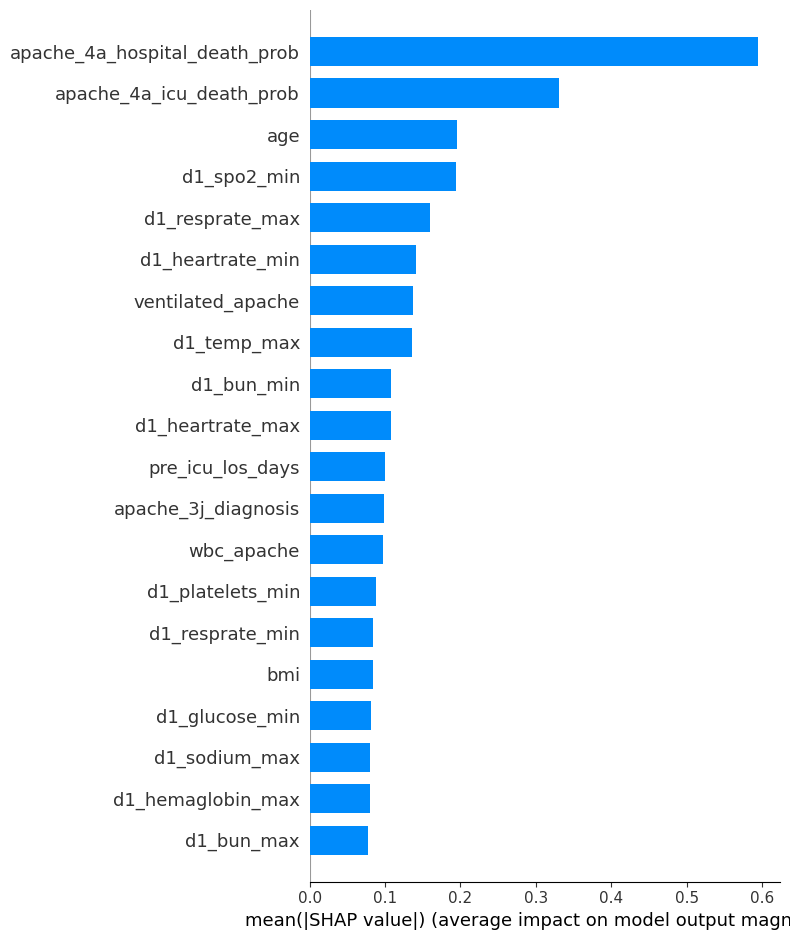

In [43]:
shap.summary_plot(shap_values, X_test_sample, plot_type="bar")

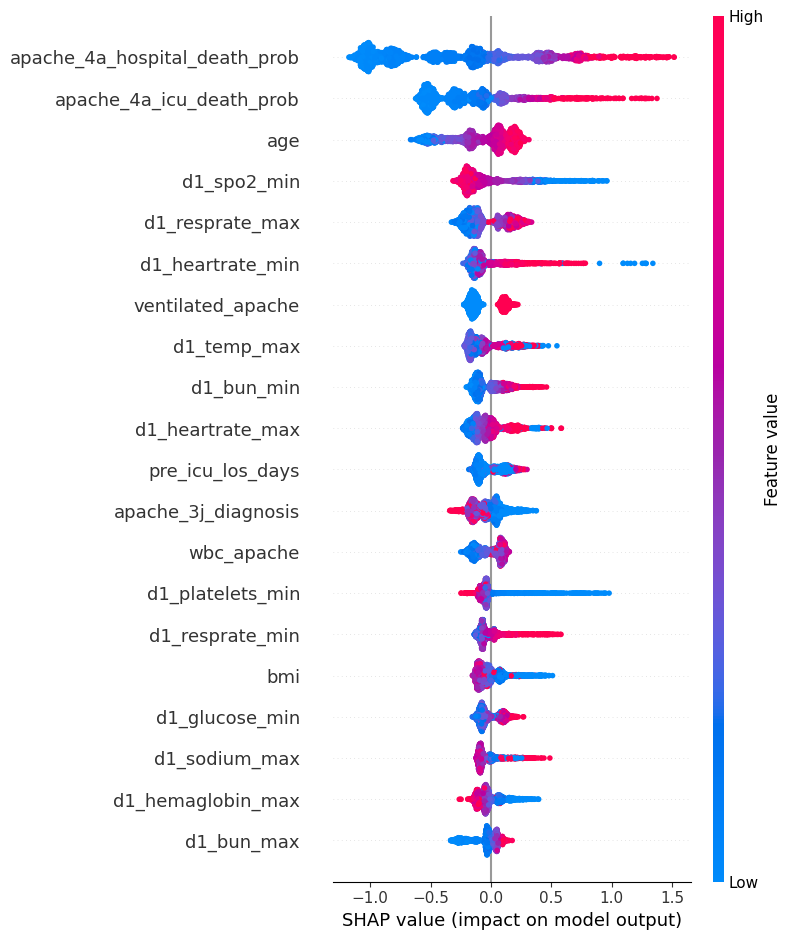

In [44]:
shap.summary_plot(shap_values, X_test_sample)

In [45]:
shap.force_plot(shap.TreeExplainer(xgb_tuned).expected_value, shap_values[0:257,:], X_test_sample.iloc[0:257,:])

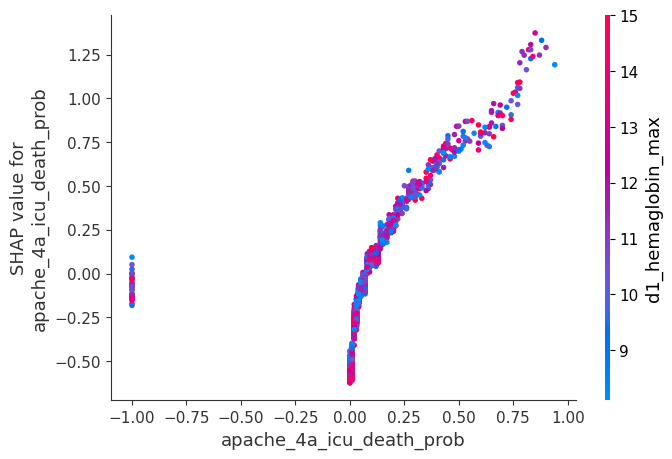

In [46]:
shap.dependence_plot('apache_4a_icu_death_prob', shap_values, X_test_sample)

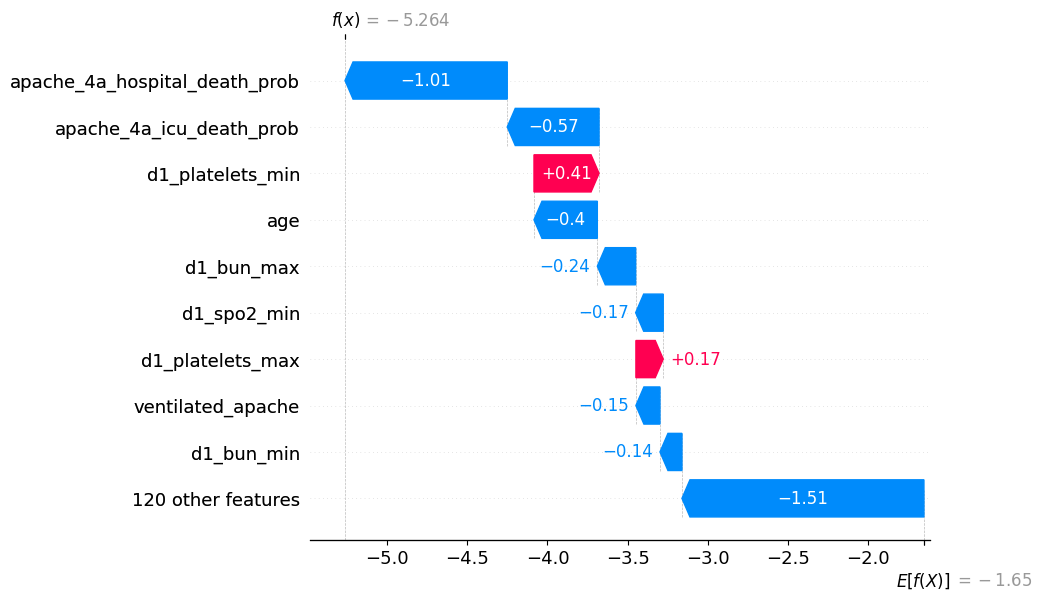

In [47]:
row = 111
shap.plots._waterfall.waterfall_legacy(shap.TreeExplainer(xgb_tuned).expected_value[0], 
                                       shap_values[row],
                                       feature_names=X_test_sample.columns.tolist()
                                      )

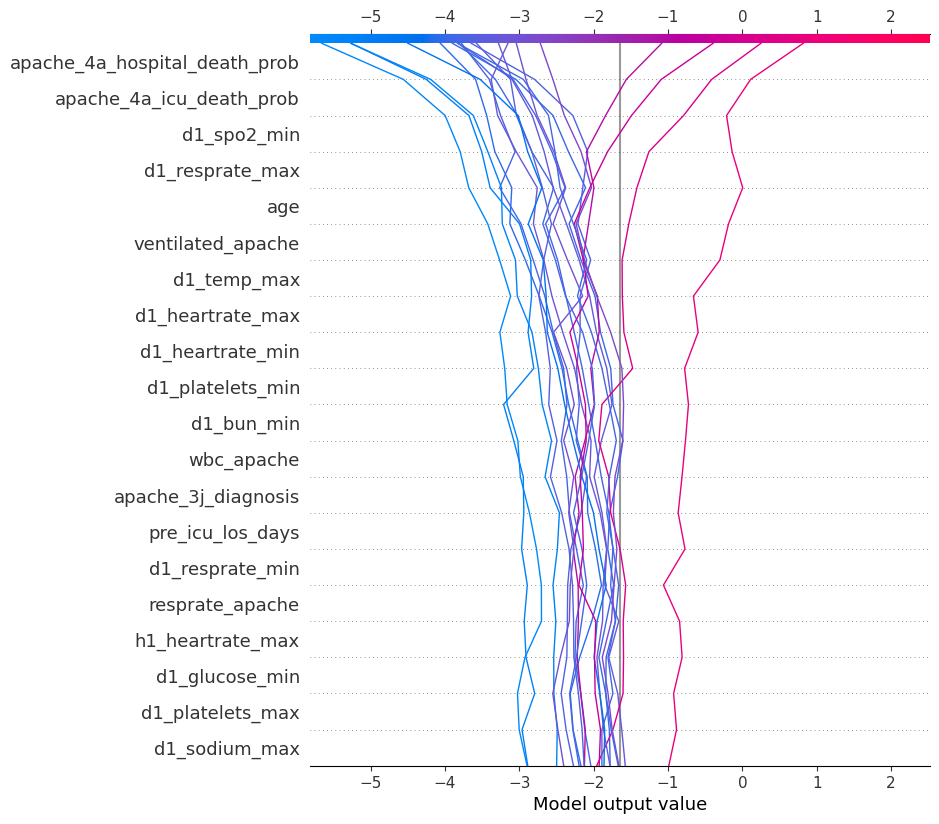

In [48]:
shap.decision_plot(shap.TreeExplainer(xgb_tuned).expected_value[0], 
                   shap_values[110:130], 
                   feature_names=X_test_sample.columns.tolist())